In [78]:
from nltk.tokenize import word_tokenize
import nltk
import collections
from nltk.corpus import stopwords
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
import spacy
import numpy as np

#from polyglot.text import Text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import re
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

In [7]:
#read the csv file
df = pd.read_csv('ffinal.csv').drop('Unnamed: 6',axis = 1).drop('Unnamed: 7',axis = 1)

reviews = df['Review']

In [35]:
df.Country[2]

nan

In [13]:
location_mapping = {' AU':'Australia',
                    ' CA':'Canada',
                    ' DE':'Germany',
                    ' DK':'Demark',
                    ' ES':'Spain',
                    ' FL':'Finland',
                    ' GB':'Britain',
                    ' GR':'Greece',
                    ' IE':'Ireland',
                    ' IN':'India',
                    ' IS':'Isreal',
                    ' NL':'Netherland',
                    ' PL':'Poland',
                    ' PT':'Potugal',
                    ' RU':'Russia',
                    ' US':'American',
                    'Elizabeth 1 review':'Britain',
                    'Kansas 2 reviews':'American'}
df['Country'] = df.Country.map(location_mapping)

In [28]:
seed = np.random.random_integers(1,17)
country_list = ['Australia','Canada','Germany','Demark','Spain','Finland','Britain','Greece','Ireland','India','Isreal','Netherland','Poland','Potugal','Russia','American']

/Users/marcowang/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 17 + 1) instead
  """Entry point for launching an IPython kernel.


In [31]:
country_list[np.random.random_integers(1,17)]# testing 

/Users/marcowang/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 17 + 1) instead
  """Entry point for launching an IPython kernel.


'Ireland'

In [37]:
nan_mapping = {NaN : country_list[np.random.random_integers(1,17)]}
df['Country'] = df.Country.map(location_mapping)

NameError: name 'NaN' is not defined

In [67]:
df['country'] = np.random.random_integers(17,size=df.shape[0])

/Users/marcowang/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 17 + 1) instead
  """Entry point for launching an IPython kernel.


In [68]:
country_mapping = {1:'Australia',
                    2:'Canada',
                    3:'Germany',
                    4:'Demark',
                    5:'Spain',
                    6:'Finland',
                    7:'Britain',
                    8:'Greece',
                    9:'Ireland',
                    10:'India',
                    11:'Isreal',
                    12:'Netherland',
                    13:'Poland',
                    14:'Potugal',
                    15:'Russia',
                    16:'American',
                    17:'France'}
df['country'] = df.country.map(country_mapping)

In [71]:
df = df[['Review','country']]

In [73]:
df.to_csv('data_with_country.csv')

In [140]:
df.head()

,Review,country,polarity,subjectivity
0,I made a booking 5 months ago with Airbnb for ...,France,0.073437,0.331250
1,Absolutely terrible service . My booking was c...,Britain,-0.400000,0.950000
2,I can't begin to state my hatred for this comp...,Russia,-0.435059,0.500000
3,"After finding a suitable property, I clicked r...",Demark,0.077143,0.334921
4,I was a host. Airbnb did not pay me adequately...,Netherland,0.333333,0.333333


In [76]:
polarity_ = []
subjectivity_ =[]
for review in reviews:
    sent = TextBlob(review).sentiment
    polarity_.append(sent.polarity)
    subjectivity_.append(sent.subjectivity)

df['polarity'] = polarity_
df['subjectivity'] = subjectivity_

/Users/marcowang/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marcowang/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/marcowang/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


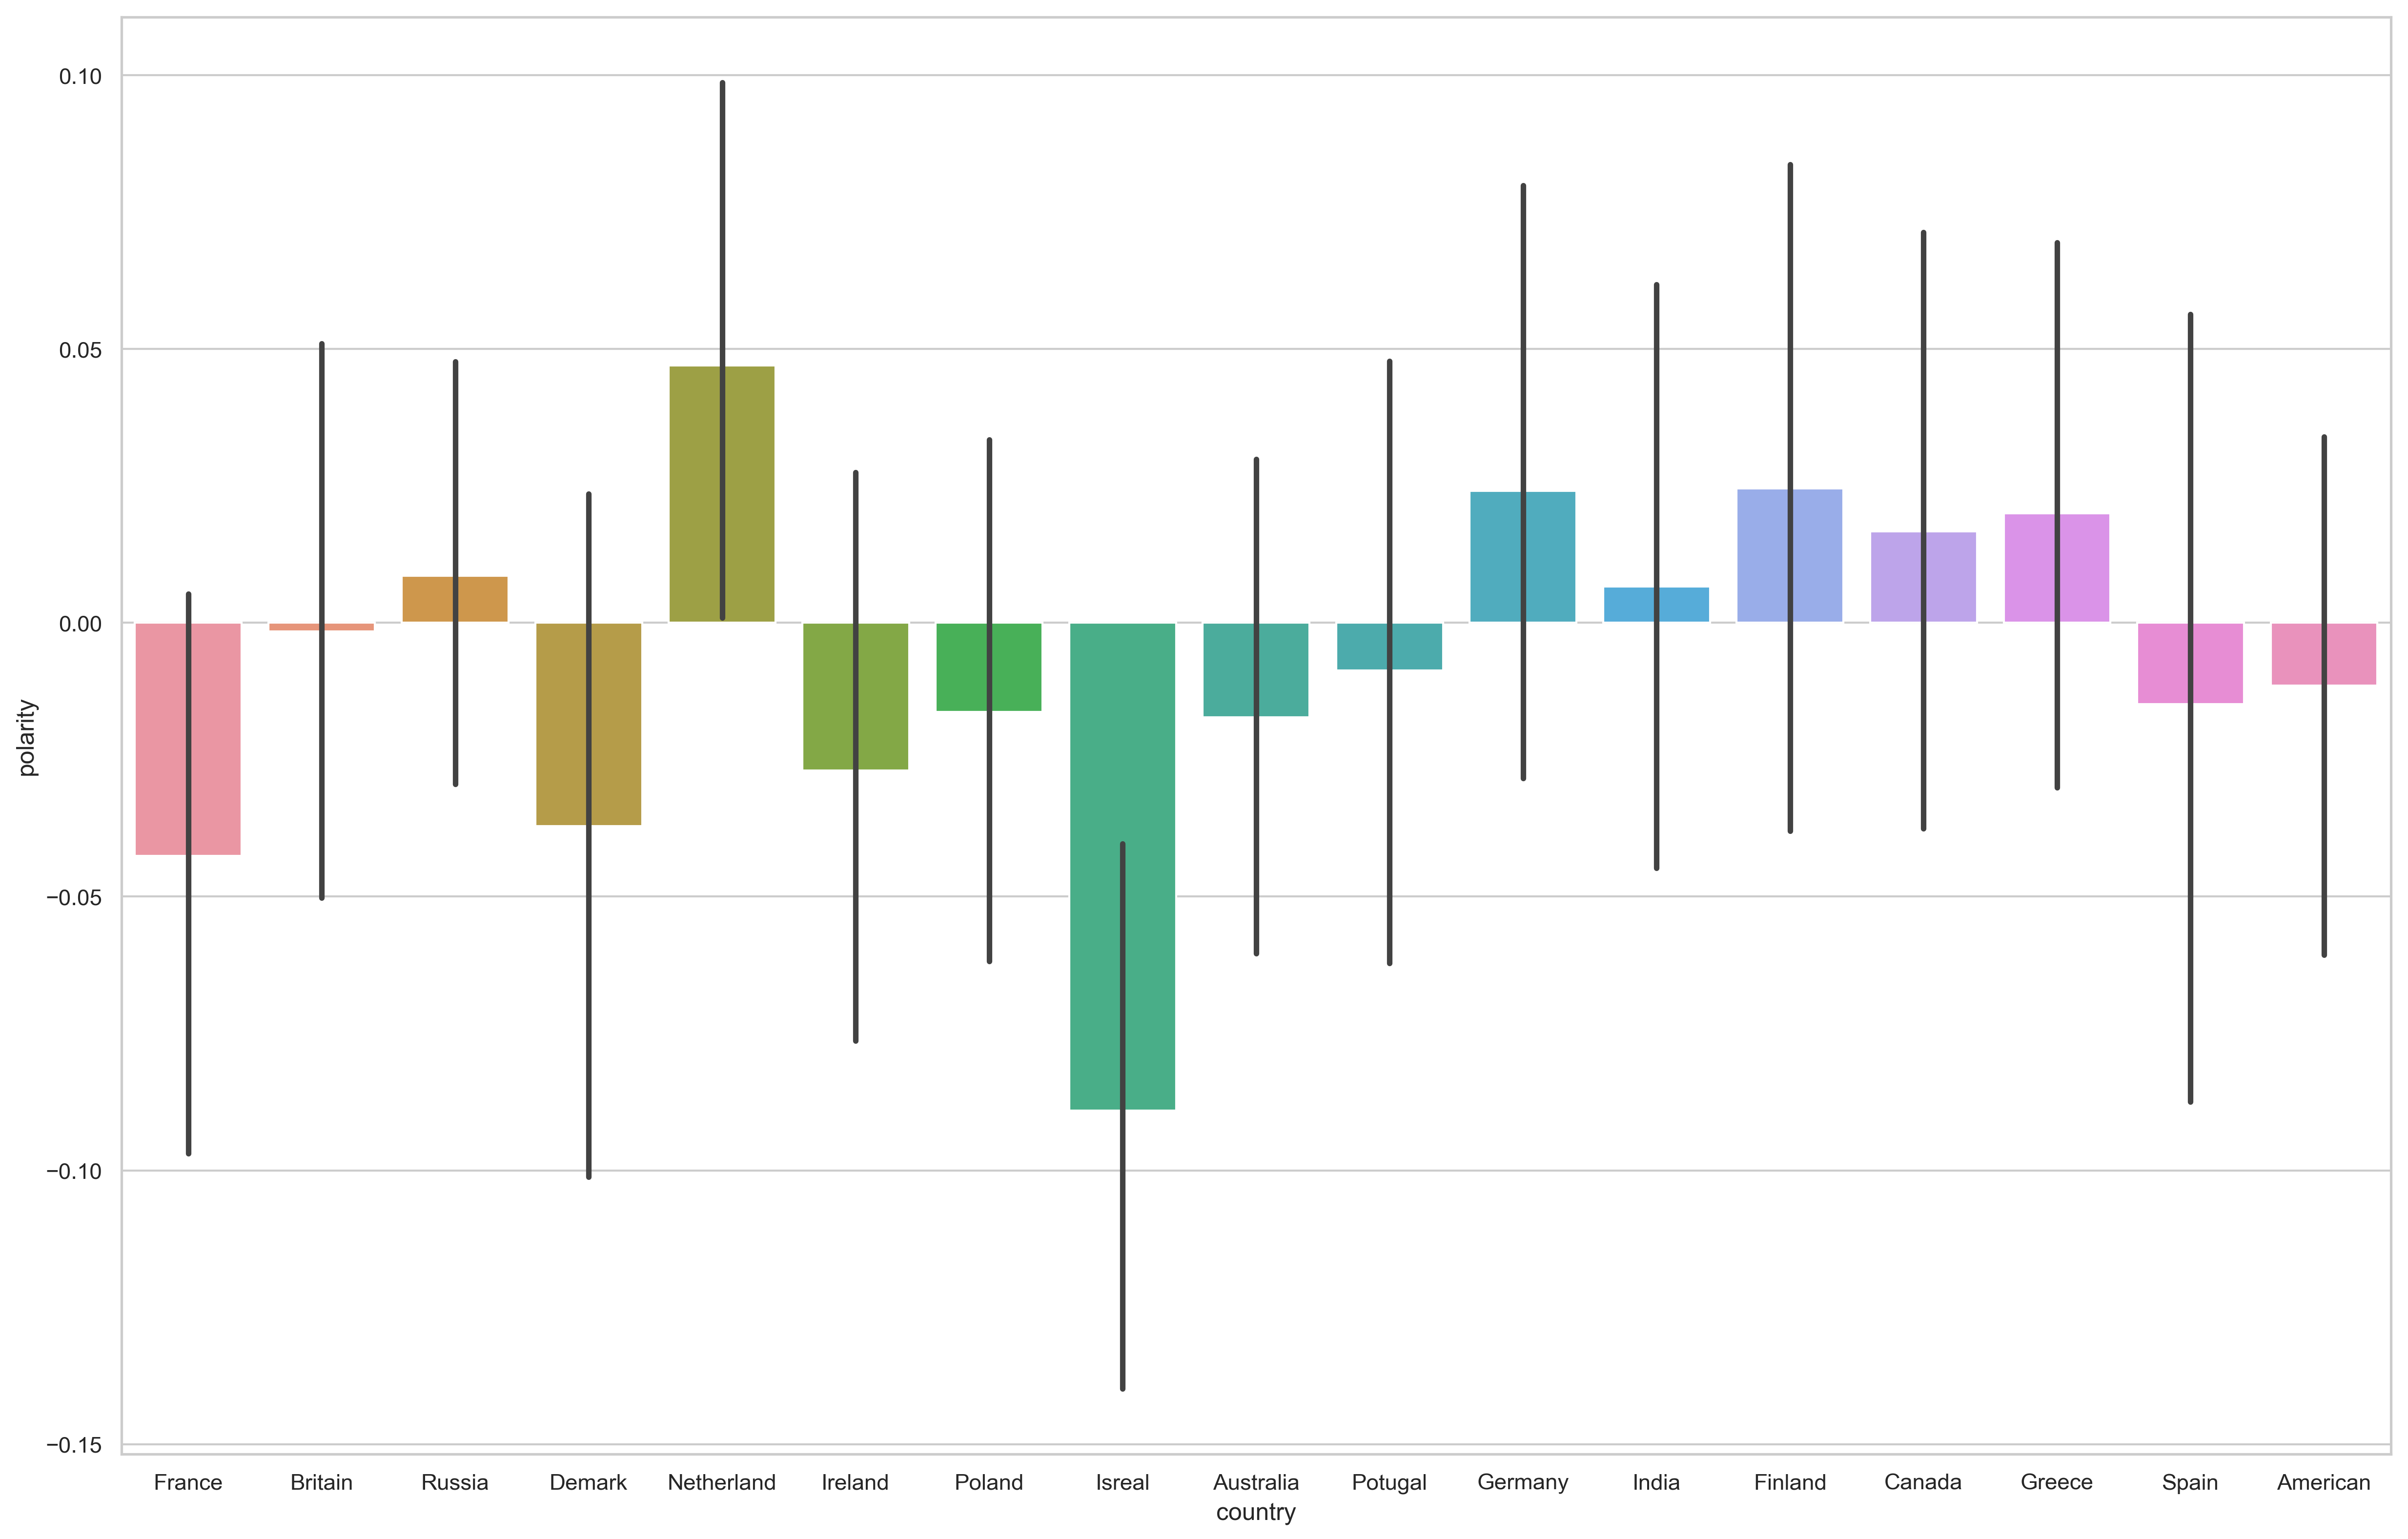

In [89]:
sns.set_style()
sent_by_country = df.groupby(['country']).mean()
plt.figure(figsize=(20,13),dpi = 300)
sns.barplot(data= df,x = 'country',y = 'polarity')

In [93]:
num_review = list(df.groupby(['country']).count().subjectivity)

In [94]:
sent_by_country['num_review'] = num_review

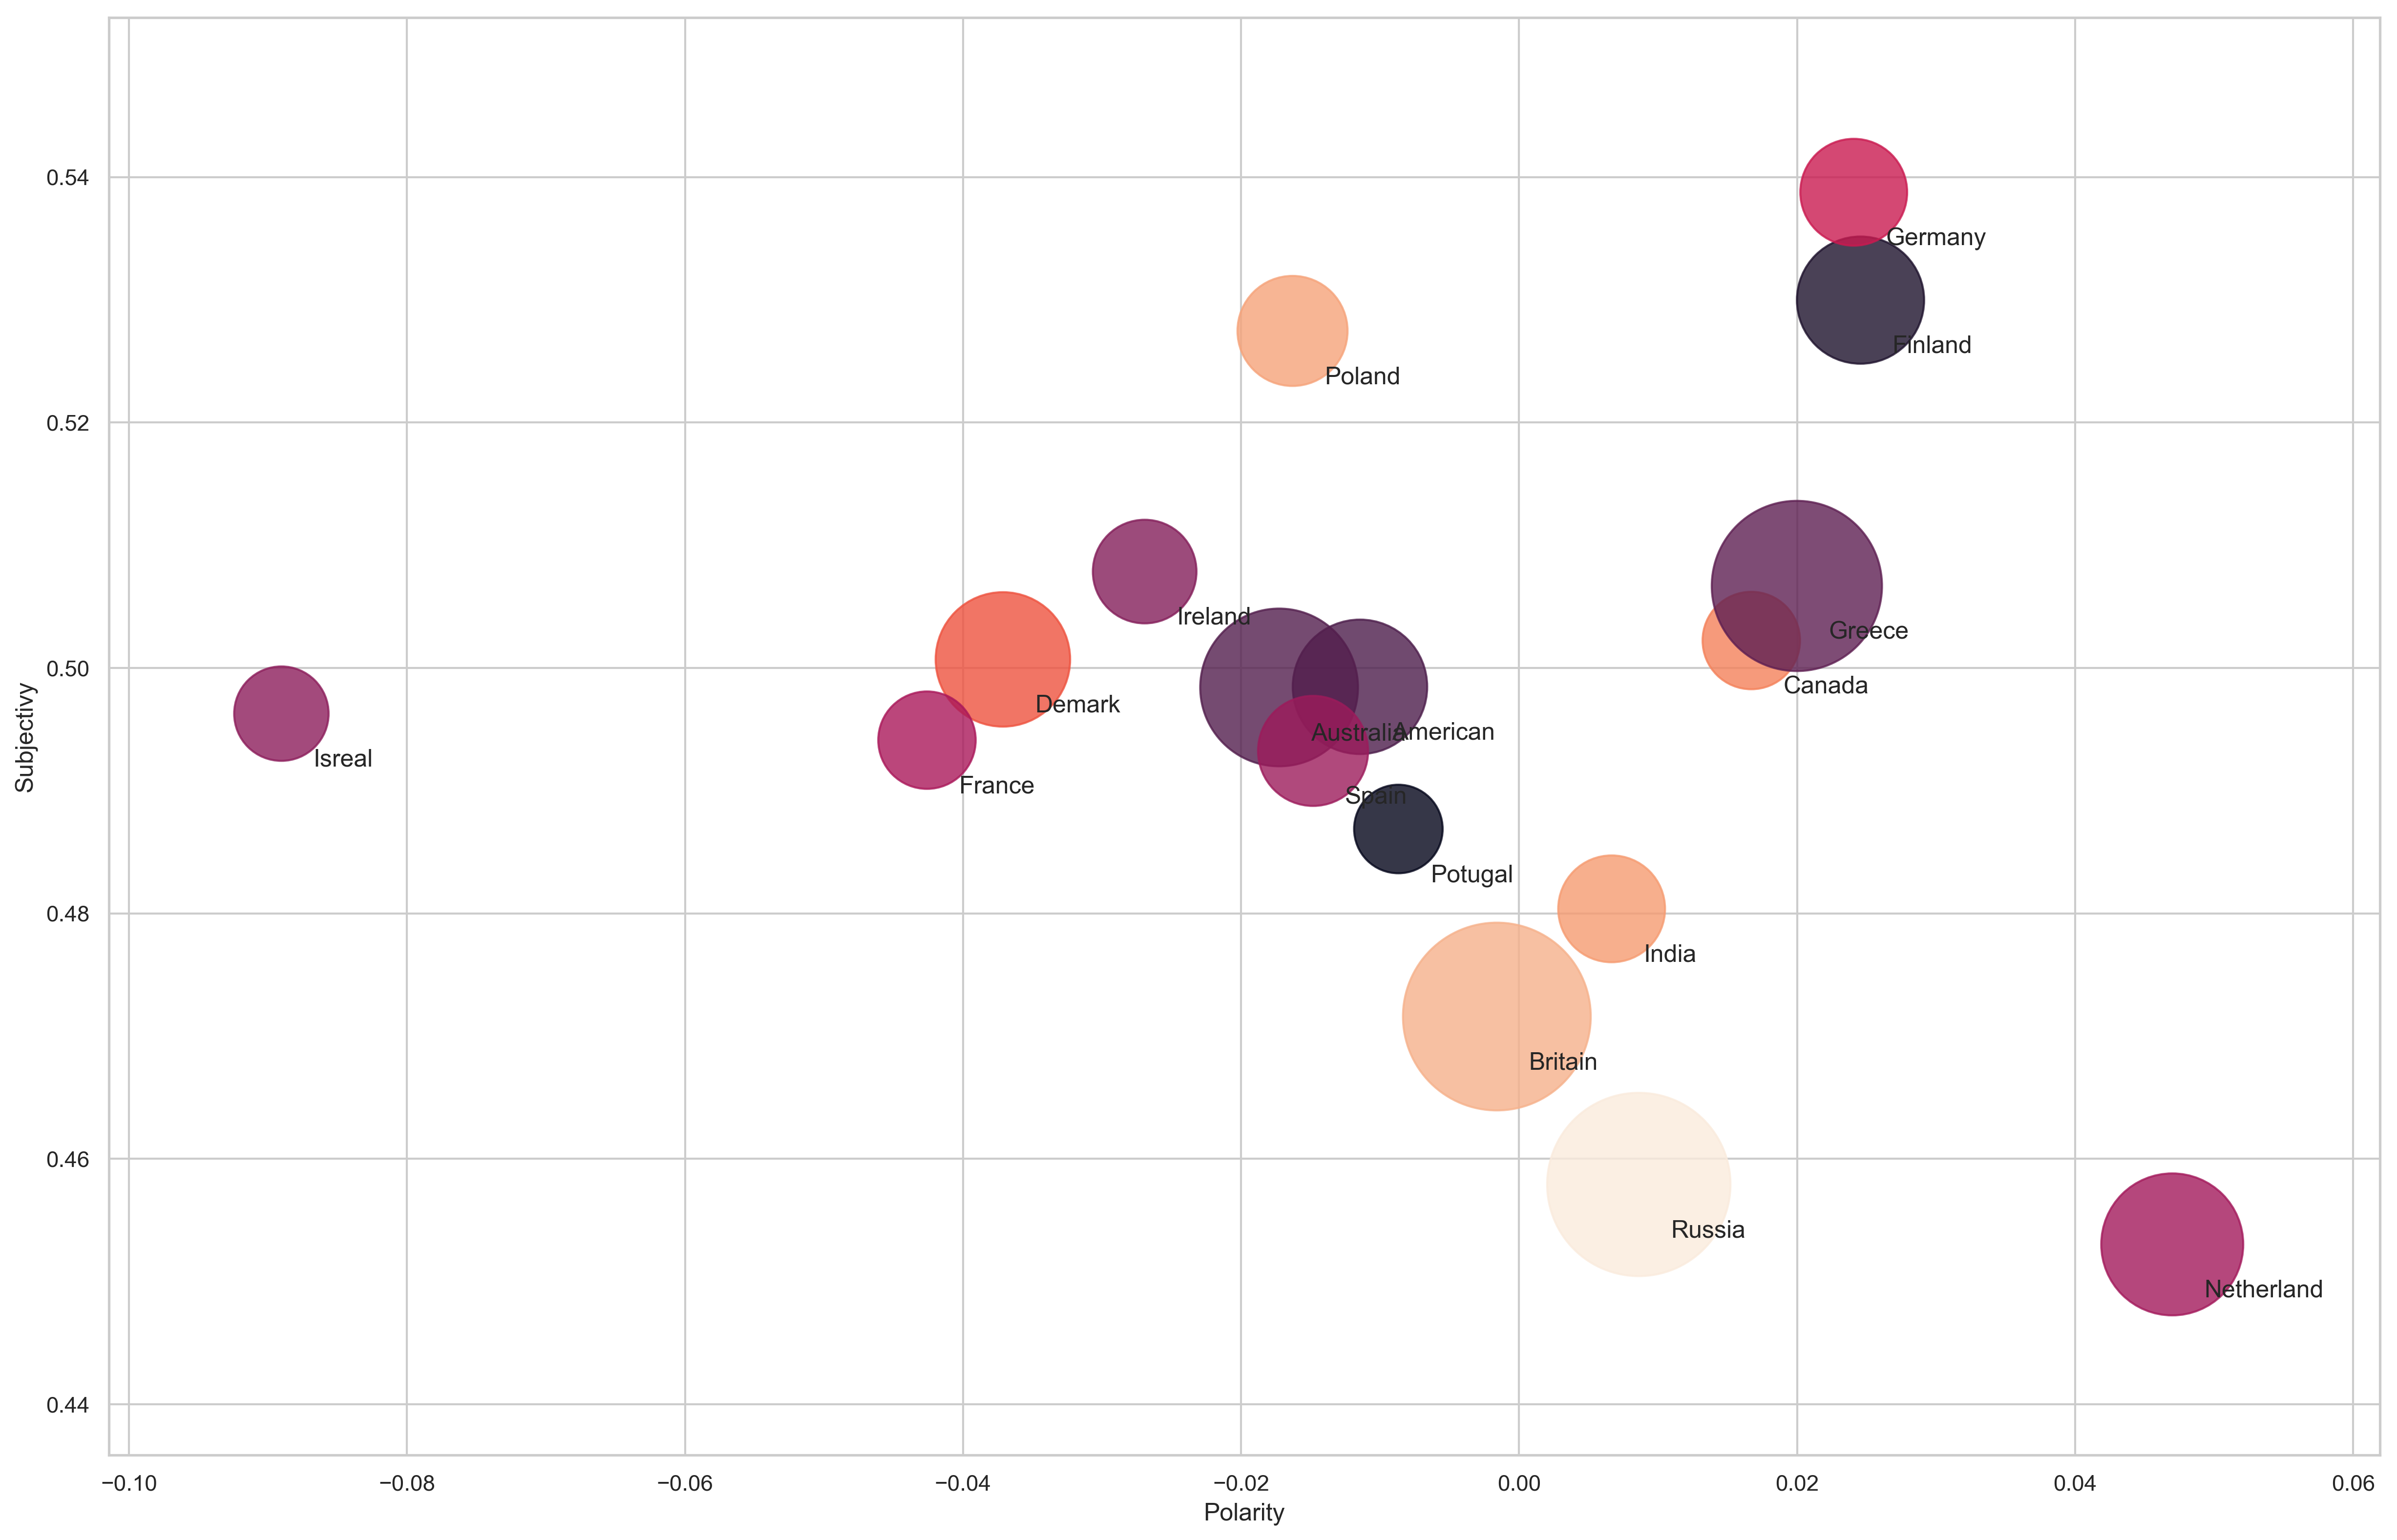

In [139]:
sent_by_country
plt.figure(figsize=(20,13),dpi = 300)
x = list(sent_by_country['polarity'])
y = list(sent_by_country['subjectivity'])
colors = np.random.rand(17)
name = list(sent_by_country.index)
size = (np.array(sent_by_country['num_review']) ** 5)*0.0000007
plt.scatter(x,y,s = size,alpha=0.8,c=colors)
plt.xlabel('Polarity')
plt.ylabel('Subjectivy')
for i in range(sent_by_country.shape[0]):
    plt.text(x[i]+0.0023,y[i]-0.0043,name[i])
plt.show()

In [137]:
name = list(sent_by_country.index)

/Users/marcowang/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


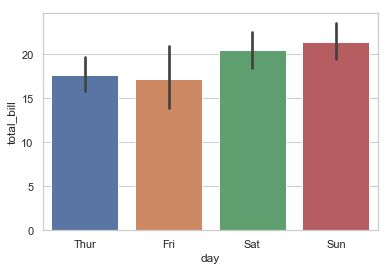

In [86]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [119]:
sent_by_country

,polarity,subjectivity,num_review
country,,,
American,-0.011448,0.498458,91
Australia,-0.017265,0.498407,97
Britain,-0.001601,0.471591,104
Canada,0.016703,0.502230,80
Demark,-0.037134,0.500692,91
Finland,0.024559,0.529969,89
France,-0.042596,0.494112,80
Germany,0.024071,0.538760,83
Greece,0.019982,0.506677,100
